# Camunda 8 Workers:
## Comparing Power Consumption in Idle

These Measurements were done with Kepler on `restworkerjava`. Scrape interval was **30 seconds**, measuring window was **21 minutes**

*Author: Jan Wittrowski*


### Cheatsheet

```df.loc[row, col]```


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rawdata = pd.read_csv("CSV/idle_1_7.csv", 
                     header=1, # which row contains column headers
                    index_col=0) # which column contains labels

rawdata

,load-controller-5445f6d748-hgqvd / worker / PKG,load-controller-54c5b8b98-pkxhj / worker / PKG,restworkerjava-56655bdb84-tndnx / worker / PKG,restworkerjava-5bff59f95d-5ghvj / worker / PKG,restworkerjava-67c4cdf457-bc649 / worker / PKG,restworkerjava-687b67c59f-g7szb / worker / PKG,restworkerjava-7949956cf9-xgkss / worker / PKG,restworkerjava-7b6d76448-d7k55 / worker / PKG,restworkerjava-7bf68d4499-2p867 / worker / PKG,restworkerjava-f54f67586-6k8q5 / worker / PKG,...,load-controller-5445f6d748-hgqvd / worker / OTHER,load-controller-54c5b8b98-pkxhj / worker / OTHER,restworkerjava-56655bdb84-tndnx / worker / OTHER,restworkerjava-5bff59f95d-5ghvj / worker / OTHER,restworkerjava-67c4cdf457-bc649 / worker / OTHER,restworkerjava-687b67c59f-g7szb / worker / OTHER,restworkerjava-7949956cf9-xgkss / worker / OTHER,restworkerjava-7b6d76448-d7k55 / worker / OTHER,restworkerjava-7bf68d4499-2p867 / worker / OTHER,restworkerjava-f54f67586-6k8q5 / worker / OTHER
Time,,,,,,,,,,,,,,,,,,,,,
2023-11-28 14:15:00,NaN,0.194,0.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:15:30,NaN,0.194,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:00,NaN,0.194,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:30,NaN,0.193,0.194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:17:00,NaN,0.195,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 17:34:00,0.195,NaN,NaN,NaN,0.197,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2023-11-28 17:34:30,0.195,NaN,NaN,NaN,0.196,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2023-11-28 17:35:00,0.200,NaN,NaN,NaN,0.202,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# remove all columns that don't have restworkerjava in their name and create two frames for PKG and DRAM info

pkg_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'PKG'])]

dram_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'DRAM'])]

#separate frames according to power domain
pkg_data = rawdata[pkg_columns_to_keep]
dram_data = rawdata[dram_columns_to_keep]



,restworkerjava-56655bdb84-tndnx / worker / DRAM,restworkerjava-5bff59f95d-5ghvj / worker / DRAM,restworkerjava-67c4cdf457-bc649 / worker / DRAM,restworkerjava-687b67c59f-g7szb / worker / DRAM,restworkerjava-7949956cf9-xgkss / worker / DRAM,restworkerjava-7b6d76448-d7k55 / worker / DRAM,restworkerjava-7bf68d4499-2p867 / worker / DRAM,restworkerjava-f54f67586-6k8q5 / worker / DRAM
Time,,,,,,,,
2023-11-28 14:15:00,0.0235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:15:30,0.0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:00,0.0192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:30,0.0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:17:00,0.0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-28 17:34:00,NaN,NaN,0.0171,NaN,NaN,NaN,NaN,NaN
2023-11-28 17:34:30,NaN,NaN,0.0170,NaN,NaN,NaN,NaN,NaN
2023-11-28 17:35:00,NaN,NaN,0.0178,NaN,NaN,NaN,NaN,NaN


In [142]:
# 1) for each column in pkg_data, find the matching column in dram_data
# 2) for each pair create new temporary dataframe temp
# 3) delete null rows from temp
column_names = []
column_data = []

# numpy.append(arr, values, axis=None)

# add pkg-data (stripped of null's)
for col in pkg_data.columns:

    # result = list(filter(lambda x: (boolean expression), sourcelist))
    list_pkg = list(filter(lambda v: v==v, pkg_data[col])) # only for NaN is v!=v

    column_data.append(list_pkg)

    # get index of col's first entry
    first_index = pkg_data[col].first_valid_index()
    if first_index is not None:
        column_names.append("PKG  "+first_index)

# add dram-data (stripped of nulls)
for col in dram_data.columns:

    # result = list(filter(lambda x: (boolean expression), sourcelist))
    list_pkg = list(filter(lambda v: v==v, dram_data[col])) # only for NaN is v!=v

    column_data.append(list_dram)

    # get index of col's first entry
    first_index = dram_data[col].first_valid_index()
    if first_index is not None:
        column_names.append("DRAM "+first_index)

In [97]:
# create dataframe from lists

temp = pd.DataFrame(column_data)

# swap columns and rows
data = temp.transpose()

# set column names
data.columns = column_names

data

,PKG 2023-11-28 14:15:00,PKG 2023-11-28 16:15:30,PKG 2023-11-28 17:15:30,PKG 2023-11-28 15:50:00,PKG 2023-11-28 16:51:00,PKG 2023-11-28 15:05:30,PKG 2023-11-28 14:43:30,PKG 2023-11-28 15:28:00,DRAM 2023-11-28 14:15:00,DRAM 2023-11-28 16:15:30,DRAM 2023-11-28 17:15:30,DRAM 2023-11-28 15:50:00,DRAM 2023-11-28 16:51:00,DRAM 2023-11-28 15:05:30,DRAM 2023-11-28 14:43:30,DRAM 2023-11-28 15:28:00
0,0.224,0.893,0.247,0.196,0.196,0.197,0.199,0.212,0.0202,0.0202,0.0202,0.0202,0.0202,0.0202,0.0202,0.0202
1,0.195,0.198,0.197,0.210,0.197,0.197,0.197,0.199,0.0176,0.0176,0.0176,0.0176,0.0176,0.0176,0.0176,0.0176
2,0.205,0.198,0.197,0.196,0.197,0.197,0.198,0.198,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172
3,0.194,0.203,0.197,0.197,0.197,0.197,0.196,0.196,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172,0.0172
4,0.195,0.202,0.198,0.197,0.196,0.197,0.197,0.196,0.0171,0.0171,0.0171,0.0171,0.0171,0.0171,0.0171,0.0171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,0.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# create sums

dram_pkg_sums = pd.DataFrame()

# find matching pkg, dram partners
for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2 and col1[4:] == col2[4:]:
            dram_pkg_sums[col1[4:]] = data[col1] + data[col2]

# drop NaNs
dram_pkg_sums.dropna(how='all')

,2023-11-28 14:15:00,2023-11-28 16:15:30,2023-11-28 17:15:30,2023-11-28 15:50:00,2023-11-28 16:51:00,2023-11-28 15:05:30,2023-11-28 14:43:30,2023-11-28 15:28:00
0,0.2442,0.9132,0.2672,0.2162,0.2162,0.2172,0.2192,0.2322
1,0.2126,0.2156,0.2146,0.2276,0.2146,0.2146,0.2146,0.2166
2,0.2222,0.2152,0.2142,0.2132,0.2142,0.2142,0.2152,0.2152
3,0.2112,0.2202,0.2142,0.2142,0.2142,0.2142,0.2132,0.2132
4,0.2121,0.2191,0.2151,0.2141,0.2131,0.2141,0.2141,0.2131
5,0.2111,0.2161,0.2141,0.2151,0.2131,0.2151,0.2131,0.2131
6,0.2115,0.2165,0.2155,0.2135,0.2135,0.2145,0.2135,0.2145
7,0.2112,0.2142,0.2142,0.2152,0.2142,0.2142,0.2132,0.2142
8,0.2142,0.2202,0.2152,0.2132,0.2132,0.2132,0.2122,0.2142
9,0.2125,0.2255,0.2135,0.2135,0.2135,0.2145,0.2135,0.2145


# Average Power Consumption In Idle

In [125]:
# create total sums for each idle run

total_sums = pd.DataFrame()

for col in dram_pkg_sums:
    total_sums.loc['Total Watt Consumed',col] = dram_pkg_sums[col].sum()
    total_sums.loc['Time measured in Min', col] = dram_pkg_sums[col].count() / 2
    total_sums.loc['Power per Min', col] = total_sums.loc['Total Watt Consumed', col] / total_sums.loc['Time measured in Min', col]

total_sums = total_sums.sort_index(axis=1)

In [124]:
# Apply param naming as columns

worker_param_columns = [ "rto=2, pi=2", "rto=2, pi=10", "rto=2, pi=30", "rto=2, pi=60", "rto=10, pi=2", "rto=10, pi=10", "rto=10, pi=30", "rto=10, pi=60" ]

total_sums.columns = worker_param_columns

total_sums



,"rto=2, pi=2","rto=2, pi=10","rto=2, pi=30","rto=2, pi=60","rto=10, pi=2","rto=10, pi=10","rto=10, pi=30","rto=10, pi=60"
Total Watt Consumed,9.112900,9.17490,9.179900,9.198900,9.207900,9.978900,9.159900,9.043400
Time measured in Min,21.500000,21.50000,21.500000,21.500000,21.500000,21.500000,21.500000,21.000000
Power per Min,0.423856,0.42674,0.426972,0.427856,0.428274,0.464135,0.426042,0.430638


**Legend**

- **rto** = ``requestTimeOut`` - the amount of time zeebe keeps a poll open
- **pi** = ``pollInterval`` - the amount of time a poll will wait after closing before polling again

In [138]:
# create 4x4 Grid evaluating against pi and rto

power_values = np.array(total_sums.loc['Power per Min',:]) #1D-Array

#reshape
power_values = power_values.reshape((2,4))

evaluation_grid = pd.DataFrame(power_values, index= ["requestTimeout=2s", "requestTimeout=10s"])
evaluation_grid.columns = ["pollInterval=2s", "pollInterval=10s", "pollInterval=30s", "pollInterval=60s"]

evaluation_grid

,pollInterval=2s,pollInterval=10s,pollInterval=30s,pollInterval=60s
requestTimeout=2s,0.423856,0.426740,0.426972,0.427856
requestTimeout=10s,0.428274,0.464135,0.426042,0.430638


# Plotting Results

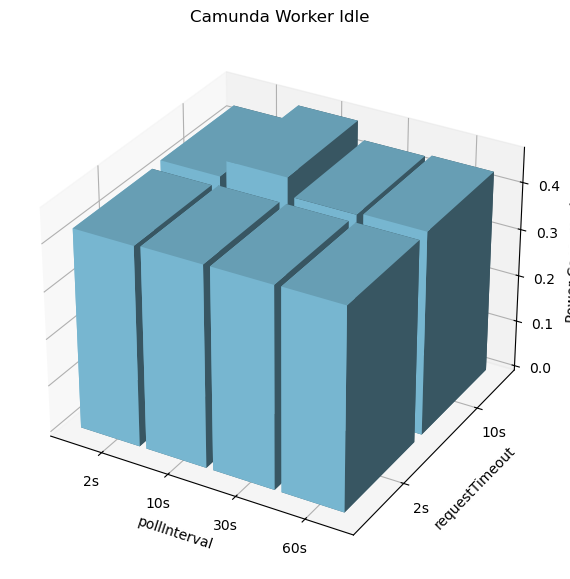

In [157]:
# Data for the 3D bar chart
x_data = ["2s","10s", "30s","60s"]
y_data = ["2s", "10s"]
z_data = power_values

# Convert data to numpy arrays for plotting
x_pos = np.arange(len(x_data))
y_pos = np.arange(len(y_data))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Bar chart plotting
dx = dy = 0.9  # Width and depth of bars
dz = np.array(z_data).flatten()

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue')

# Setting labels for axes
ax.set_xticks(np.arange(len(x_data)) + 0.5)
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(y_data)) + 0.5)
ax.set_yticklabels(y_data)
ax.set_xlabel('pollInterval')
ax.set_ylabel('requestTimeout')
ax.set_zlabel('Power Consumption')

plt.title('Camunda Worker Idle')
plt.show()